## Stock price prediction 

sources: 
- https://www.askpython.com/python/examples/stock-price-prediction-python
- https://towardsdatascience.com/easiest-guide-to-getting-stock-data-with-python-f74b5f75d179
- https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html

In [58]:
# Import libraries

import sys
!pip install -U -q segmentation-models
!pip install -U -q tensorflow==2.4.1
!pip install -U -q keras==2.3.1
!pip install -U -q tensorflow-estimator==2.4.0
!pip install -U -q yfinance

import tensorflow as tf
import tensorflow.keras
import segmentation_models as sm

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler

print('importing finished')

importing finished


In [59]:
# The following code does four things:
# 1) download Tesla stock data
# 2) turn it inta a Pandas DataFrame
# 3) Reset the indext so the date value becomes a regular column
# 4) show the first 5 rows

TICK = yf.download('TSLA')
TICK = pd.DataFrame(TICK)
TICK.reset_index(inplace=True)
TICK.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


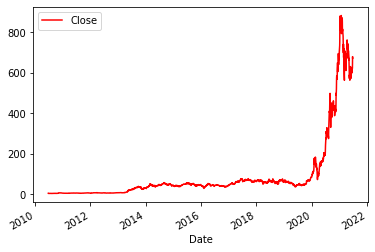

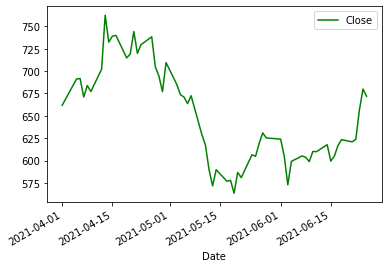

In [64]:
#  Plotting date vs the close market stock price
TICK.plot("Date",'Close',color="red")

# Extract only top 60 rows to make the plot a little clearer
TICK_small = TICK.tail(60)

#  Plotting date vs the close  market stock price
TICK_small.plot('Date','Close',color="green")

plt.show()

In [66]:
# 1. Filter out the closing market price data
close_data = TICK.filter(['Close'])

# 2. Convert the data into array for easy evaluation
dataset = close_data.values

# 3. Scale/Normalize the data to make all values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# 4. Creating training data size : 70% of the data
training_data_len = math.ceil(len(dataset) *.7)
train_data = scaled_data[0:training_data_len  , : ]

# 5. Separating the data into x and y data
x_train_data=[]
y_train_data =[]
for i in range(60,len(train_data)):
    x_train_data=list(x_train_data)
    y_train_data=list(y_train_data)
    x_train_data.append(train_data[i-60:i,0])
    y_train_data.append(train_data[i,0])

    # 6. Converting the training x and y values to numpy arrays
    x_train_data1, y_train_data1 = np.array(x_train_data), np.array(y_train_data)

    # 7. Reshaping training s and y data to make the calculations easier
    x_train_data2 = np.reshape(x_train_data1, (x_train_data1.shape[0],x_train_data1.shape[1],1))

In [67]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train_data2.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [68]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train_data2, y_train_data1, batch_size=1, epochs=1)

1878/1878 [==============================] - 65s 32ms/step - loss: 1.0471e-04


In [70]:
# 1. Creating a dataset for testing
test_data = scaled_data[training_data_len - 60: , : ]
x_test = []
y_test =  dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

# 2.  Convert the values into arrays for easier computation
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

# 3. Making predictions on the testing data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [71]:
rmse = np.sqrt(np.mean(((predictions- y_test)**2)))
print(rmse)

89.15547343605859


/home/alex/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


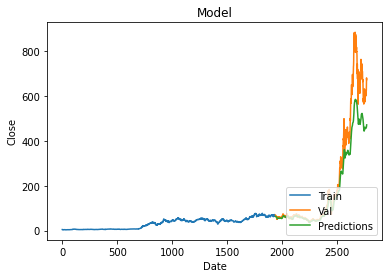

<Figure size 720x360 with 0 Axes>

In [81]:
train = TICK[:training_data_len]
valid = TICK[training_data_len:]

valid['Predictions'] = predictions

plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close')

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

plt.figure(figsize=(10,5))

plt.show()

To do:
- reduce RSME
- improve visualization
- make it easier to apply the model to different Stock data
- long term: find high potential sotck, or compare stock to eachother